In [1]:
from transformer import *
from tokeniser import Tokeniser, plot_tok2vec
from load_text import load_prideandprejudice, load_warandpeace
from tok2vec import tok2Vec
import matplotlib.pyplot as plt

2024-05-21 23:47:26.509201: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-21 23:47:26.533222: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-21 23:47:26.977032: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqd

In [10]:
seq_len = 128    #Length of the input sequence to the transformer
vec_dim = 150    #Dimension of the embedding vectors
window_size = 8  #Size of the window for the tok2vec model
embedding_epochs = 10  #Number of epochs to train the embedding for
transformer_epochs = 5      #Number of epochs to train the transformer for
text_length = 800000 # / 121810 / 700000
vocab_size = 2000
embedding_type = "TOK2VEC" # BERT, TOK2VEC, ONEHOT
method = "skipgram"
dataset = "warandpeace" # warandpeace, prideandprejudice
load_embedding = True

tokeniser_filename= f'vocab/vocab_{vocab_size}_{dataset}.json'
tok2vec_savename = f'tok2vec_{vocab_size}_{vec_dim}_{text_length}_{window_size}_{embedding_epochs}_{method}_{dataset}'
transformer_savename = f'transformer_{seq_len}_{embedding_type}_{transformer_epochs}_{tok2vec_savename}'

# Load text for training  
print("Loading " + dataset + "...")
if dataset == "prideandprejudice":
    text = load_prideandprejudice(max_words=text_length)
elif dataset == "warandpeace":
    text = load_warandpeace(max_words=text_length)

Loading warandpeace...
unique words:  34494


Loading tokeniser from 'vocab/vocab_2000_warandpeace.json'...
Converting training text to tokens...


  0% (0 of 1926) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (1 of 1926) |                       | Elapsed Time: 0:00:00 ETA:   0:04:46
  0% (3 of 1926) |                       | Elapsed Time: 0:00:00 ETA:   0:03:53
  0% (5 of 1926) |                       | Elapsed Time: 0:00:00 ETA:   0:03:36
  0% (6 of 1926) |                       | Elapsed Time: 0:00:00 ETA:   0:03:33
  0% (8 of 1926) |                       | Elapsed Time: 0:00:00 ETA:   0:03:23
  0% (10 of 1926) |                      | Elapsed Time: 0:00:00 ETA:   0:03:07
  0% (12 of 1926) |                      | Elapsed Time: 0:00:01 ETA:   0:02:59
  0% (14 of 1926) |                      | Elapsed Time: 0:00:01 ETA:   0:02:56
  0% (16 of 1926) |                      | Elapsed Time: 0:00:01 ETA:   0:02:52
  0% (18 of 1926) |                      | Elapsed Time: 0:00:01 ETA:   0:02:46
  1% (20 of 1926) |                      | Elapsed Time: 0:00:01 ETA:   0:02:42
  1% (22 of 1926) |                     

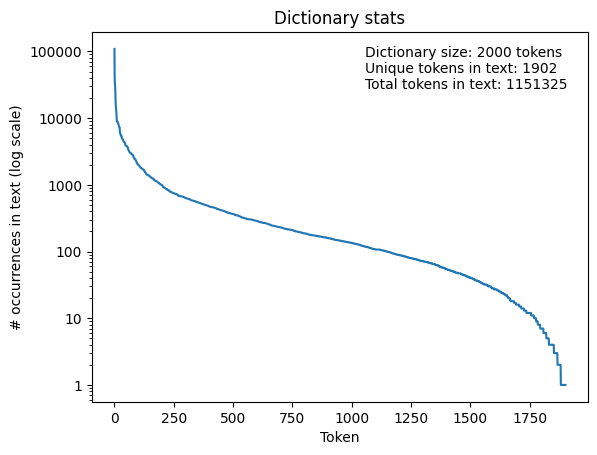

In [3]:
# Train/Load tokeniser
if os.path.exists(tokeniser_filename):
    print("Loading tokeniser from '%s'..." % (tokeniser_filename))
    tokeniser = Tokeniser.load(tokeniser_filename)
else:
    # Create a new tokeniser, train it on the text and save it to disk
    tokeniser = Tokeniser(vocab_size=vocab_size)
    print("Building BPE tokeniser...")
    tokeniser.train(text, verbose=True)
    print("Saving tokeniser to '%s'..." % (tokeniser_filename))
    tokeniser.save(tokeniser_filename)
print("Converting training text to tokens...")
ids = tokeniser.encode(text, verbose=True)  
tokeniser.plot(text, ids)

In [4]:
def get_english_words(_tokeniser):
    try:
        import nltk
    except:
        raise RuntimeError("Error: nltk is not installed. Please install nltk using 'pip install nltk'")

    # Select up to 100 words from the tokens that are in the words dictionary
    try:
        nltk.data.find('corpora/words')
    except LookupError:
        nltk.download('words')

    english_dictionary = nltk.corpus.words.words()
    vocab_size = len(_tokeniser.word_index)
    show_word_tokens = []
    words = list(_tokeniser.word_index.keys())
    for i in range(vocab_size):
        word = words[i]
        if word[0] == ' ':
            if len(word) > 4 and word[1:] in english_dictionary:
                show_word_tokens  += [i]
        else:
            if len(word) > 3 and word in english_dictionary:
                show_word_tokens  += [i]
    return show_word_tokens

show_word_tokens = get_english_words(tokeniser)

print(len(show_word_tokens))

711


In [5]:
# count sentences in the text
sentences = text.split('.')
print("Number of sentences: ", len(sentences))

Number of sentences:  30564


Number of unique words:  16584
{'frame', 'Archduchy', 'inconsolable', 'Ignátevna', 'pensive', 'apologize', 'spiteful', 'vivat', 'openwork', 'car', 'added', 'belying', 'Four', 'trials', 'duck', 'mourning', 'songs', 'rhythmic', 'particulars', 'reappeared', 'buying', 'latest', 'negotiations', 'loins', 'knife', 'course', 'straggly', 'archduchess', 'piled', 'incoherently', 'musketry', 'Nous', 'Venetian', 'meant', 'hurting', 'À', 'except', 'butt', 'concepts', 'hypothetical', 'wrong', 'embracing', 'exactitude', 'moistened', 'receive', 'Arranging', 'Swaying', 'wonder', 'hussars', 'always', 'consists', 'washing', 'voices', 'corrects', 'somberly', 'uselessness', 'deign', 'To', 'r', 'grades', 'levy', 'ill', 'offended', 'daubed', 'stipulates', 'Vyázma', 'denied', 'celui', 'eloquent', 'comprehend', 'languor', 'Zaymíshche', 'precluding', 'attendants', 'dirty', 'enabling', 'lisp', 'abounding', 'Markets', 'united', 'grown', 'administered', 'rooted', 'Empire', 'preparations', 'throttle', 'expand', 'sun

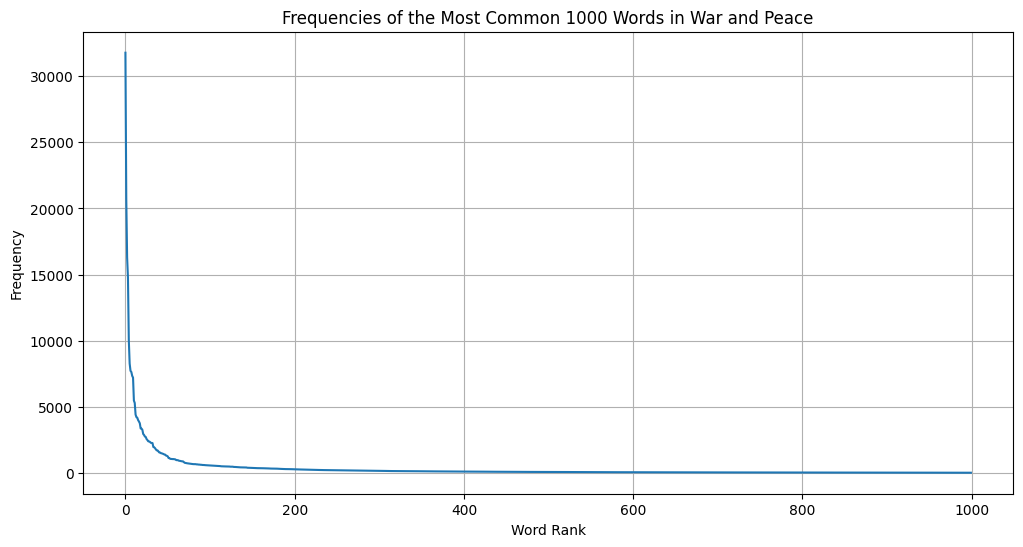

In [6]:

from collections import Counter
# count unique words in the text
words = [word for word in text.split() if word.isalpha()]
unique_words = set(words)
# remove word plus punctuation
print("Number of unique words: ", len(unique_words))
print(unique_words)

# Calculate word frequencies
word_freq = Counter(words)

# Sort words by frequency
most_common_words = word_freq.most_common(1000)

# Extract words and their frequencies for plotting
words, frequencies = zip(*most_common_words)

plt.figure(figsize=(12, 6))
plt.plot(frequencies)
plt.title('Frequencies of the Most Common 1000 Words in War and Peace')
plt.xlabel('Word Rank')
plt.ylabel('Frequency')
# plt.yscale('log')
plt.grid(True)
plt.show()


In [7]:
# Train/Load the embedding
print("Training/Loading embedding...")
w_tok2vec, history = tok2Vec(vocab_size, ids, 
              window_size, vec_dim, 
              embedding_epochs, 
              method=method, 
              savename=tok2vec_savename, 
              load_from_file=True)
print("Embedding shape: " + str(w_tok2vec.shape))

Training/Loading embedding...


2024-05-21 23:48:19.198983: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-21 23:48:19.218641: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-21 23:48:19.218758: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Embedding shape: (2000, 150)


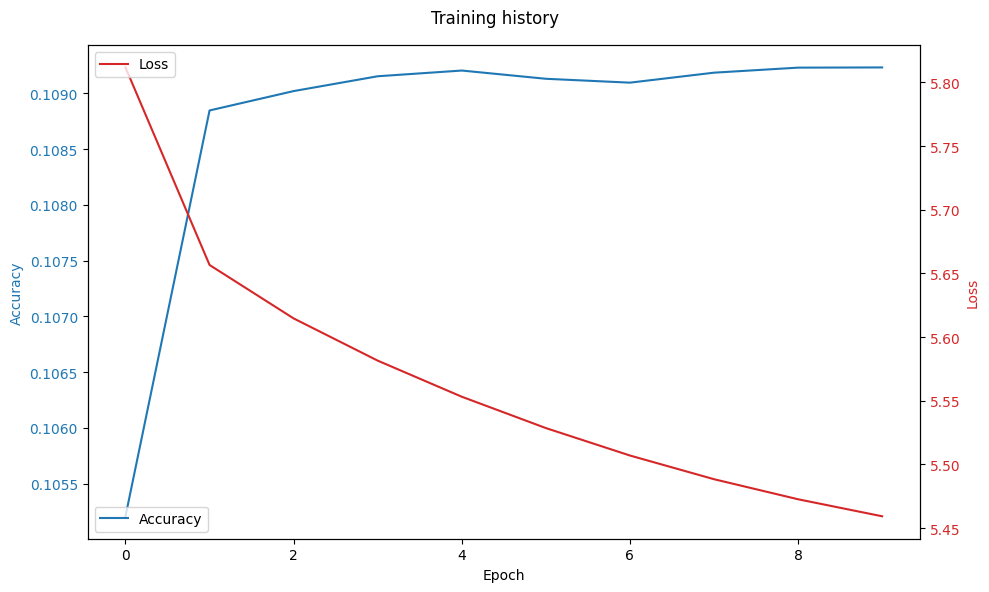

In [8]:
def plot_train_history(history, title):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot accuracy with the primary y-axis
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy', color='tab:blue')
    ax1.plot(history['accuracy'], label='Accuracy', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis for the loss
    ax2 = ax1.twinx()
    ax2.set_ylabel('Loss', color='tab:red')
    ax2.plot(history['loss'], label='Loss', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Add a title and show the plot
    fig.suptitle(title)
    fig.tight_layout()  # Adjust layout to fit both y-axes

    # Add legends
    ax1.legend(loc='lower left')
    ax2.legend(loc='upper left')

    plt.show()

plot_train_history(history, f'Training history')


Plotting word vectors in 2D using t-SNE...


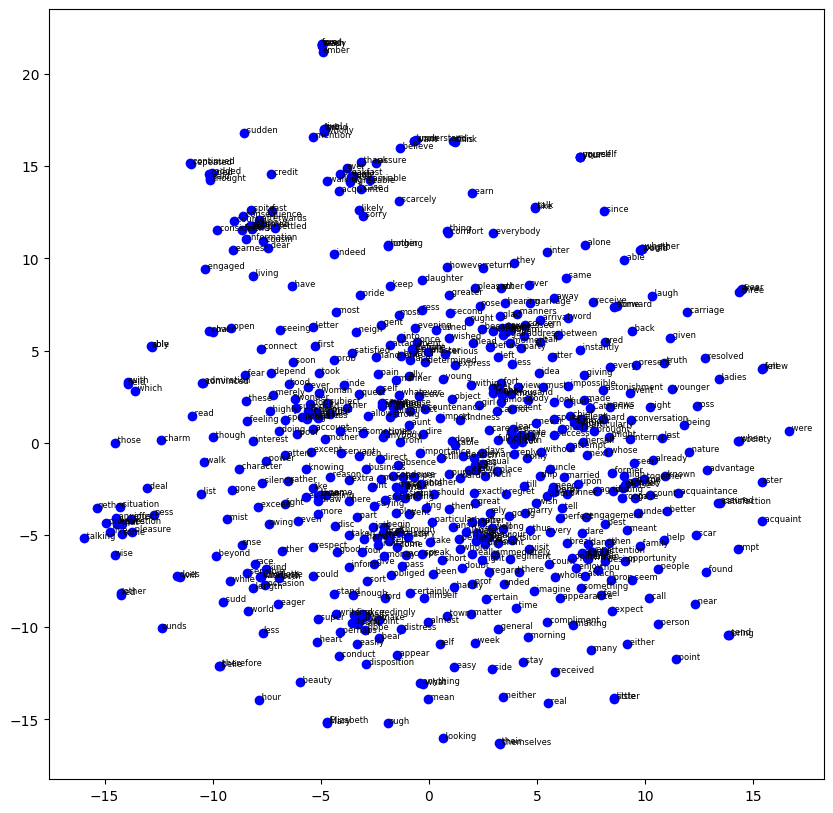

In [12]:
from tokeniser import plot_tok2vec
plot_tok2vec(w_tok2vec, tokeniser.word_index, num_words_to_show=600, figsize=(10, 10), fontsize=6)

In [1]:
import numpy as np
from tok2vec import tok2Vec

# Define the vector dimensions to compare
window_sizes = [50, 100, 150, 300]

# Create an empty dictionary to store the embeddings
embeddings = {}
histories = {}

# Train the embeddings for each vector dimension
for dim in window_sizes:
    # Update the tok2vec_savename with the new vector dimension
    tok2vec_savename = f'tok2vec_{vocab_size}_{dim}_{text_length}_{window_size}_{embedding_epochs}_{method}_{dataset}'
    
    # Train/Load the embedding
    print(f"Training/Loading embedding for vector dimension {dim}...")
    embeddings[dim], histories[dim] = tok2Vec(vocab_size, ids, 
                                 window_size, dim, 
                                 embedding_epochs, 
                                 method=method, 
                                 savename=tok2vec_savename, 
                                 load_from_file=load_embedding)
    plot_train_history(histories[dim], title=f'Training history for vector dimension {dim}')
    plot_tok2vec(embeddings[dim], tokeniser.word_index, num_words_to_show=200, figsize=(7, 7), fontsize=6, title=f'Embedding for vector dimension {dim}')

2024-05-21 23:43:06.911222: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-21 23:43:06.935137: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-21 23:43:07.376359: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


NameError: name 'vocab_size' is not defined

In [13]:
import numpy as np
from tok2vec import tok2Vec

# Define the window sizes dimensions to compare
window_sizes = [4, 8, 12]
vec_dim = 100

# Create an empty dictionary to store the embeddings
embeddings = {}
histories = {}

# Train the embeddings for each vector dimension
for window_size in window_sizes:
    # Update the tok2vec_savename with the new vector dimension
    tok2vec_savename = f'tok2vec_{vocab_size}_{vec_dim}_{text_length}_{window_size}_{embedding_epochs}_{method}_{dataset}'
    
    # Train/Load the embedding
    print(f"Training/Loading embedding for window size {window_size}...")
    embeddings[dim], histories[dim] = tok2Vec(vocab_size, ids, 
                                 window_size, vec_dim, 
                                 embedding_epochs, 
                                 method=method, 
                                 savename=tok2vec_savename, 
                                 load_from_file=load_embedding)
    plot_train_history(histories[dim], title=f'Training history for window size {window_size}')
    plot_tok2vec(embeddings[dim], tokeniser.word_index, num_words_to_show=700, figsize=(15, 15), fontsize=6, title=f'Embedding for window size {window_size}')

Training/Loading embedding for window size 4...


/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-21 18:48:18.270358: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-21 18:48:18.293157: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2000)           │       200,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 400,000 (1.53 MB)

 Trainable params: 400,000 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40


/home/jet/miniconda3/envs/tf/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1716274098.790648 1071379 service.cc:145] XLA service 0x758328007d30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716274098.790667 1071379 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 4080, Compute Capability 8.9
2024-05-21 18:48:18.797766: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-21 18:48:18.825519: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00

  68/9065 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.0317 - loss: 7.5941     

I0000 00:00:1716274100.343775 1071379 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9065/9065 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.1365 - loss: 5.6264
Epoch 2/40
9065/9065 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.1625 - loss: 4.9673
Epoch 3/40
9065/9065 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.1622 - loss: 4.8931
Epoch 4/40
5545/9065 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.1634 - loss: 4.8440

KeyboardInterrupt: 